In [12]:
import pandas as pd
import numpy as np
import json
import nltk
import regex
import collections, re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import itertools
from sklearn.cluster import KMeans
from tqdm import tqdm
from gensim.models import Word2Vec 
#import umap.umap_ as umap
#NLP libraries
from sklearn.feature_extraction.text import CountVectorizer
#for visualization
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import AffinityPropagation
from sklearn.manifold import TSNE

In [13]:
#ns_reviews = pd.read_csv('corpus-refined-features.csv')
ns_reviews = pd.read_csv('cmpb.csv')
#ns_reviews.dropna(inplace = True)

In [14]:
ns_reviews['Content'] = ns_reviews['Content'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split()))
#remove punctuations
ns_reviews['Content'] = ns_reviews['Content'].str.replace('[^\w\s]','')
#remove stopwords
stop = stopwords.words('english')
ns_reviews['Content'] = ns_reviews['Content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
#remove common words
freq = pd.Series(' '.join(ns_reviews['Content']).split()).value_counts()[:10]
freq = list(freq.index)
ns_reviews['Content'] = ns_reviews['Content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
#remove rare words
rare = pd.Series(' '.join(ns_reviews['Content']).split()).value_counts()[-10:]
rare = list(rare.index)
ns_reviews['Content'] = ns_reviews['Content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in rare))
ns_reviews.head()

<ipython-input-14-122a2da81bcf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ns_reviews['Content'] = ns_reviews['Content'].str.replace('[^\w\s]','')


,Unnamed: 0,Reviewer,Stars,Age,Content
0,0,VINCENT HO,5 stars,2 months ago,professional recommended patient kind respectf...
1,1,Aryan Shukla,5 stars,2 months ago,unlike may suggest adequately friendlylike any...
2,2,Kzzny Gaming,4 stars,5 months ago,overall fine good experience tip u going check...
3,3,ShiJie 12311,4 stars,5 months ago,went ns checkup today 29 august 8am went gate ...
4,4,ashvin nagi,1 star,a month ago,bother showing timing assigned youll end waiti...


In [15]:
reviews = ns_reviews['Content']
tok_reviews = [nltk.word_tokenize(r) for r in reviews]

In [18]:
model_ns = Word2Vec(window = 3, min_count = 2,  negative = 10, # for negative sampling
                          alpha=0.03, min_alpha=0.0007,seed = 14)
model_ns.build_vocab(tok_reviews, progress_per=200)
model_ns.train(tok_reviews, total_examples=model_ns.corpus_count,epochs=model_ns.epochs)

(317, 2195)

In [19]:
model_ns.most_similar('experience')[:5]

<ipython-input-19-02aadd91a703>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_ns.most_similar('experience')[:5]


[('keep', 0.21218901872634888),
 ('gate', 0.18037939071655273),
 ('ask', 0.1696135252714157),
 ('checkup', 0.1599636971950531),
 ('kind', 0.15265336632728577)]

In [20]:
model_ns.most_similar('time')

<ipython-input-20-5d426a9e60c7>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_ns.most_similar('time')


[('nowhere', 0.1971273422241211),
 ('u', 0.17423002421855927),
 ('real', 0.16298907995224),
 ('need', 0.15046708285808563),
 ('public', 0.14881639182567596),
 ('waiting', 0.1254747211933136),
 ('good', 0.11634078621864319),
 ('recommended', 0.11135528981685638),
 ('kind', 0.10737085342407227),
 ('rest', 0.10381986200809479)]

In [21]:
X = np.array([model_ns[word] for word in model_ns.wv.vocab.keys()])

<ipython-input-21-b2851439f4f5>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = np.array([model_ns[word] for word in model_ns.wv.vocab.keys()])


In [22]:
type(X[0])

numpy.ndarray

In [23]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

c:\python38\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\python38\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


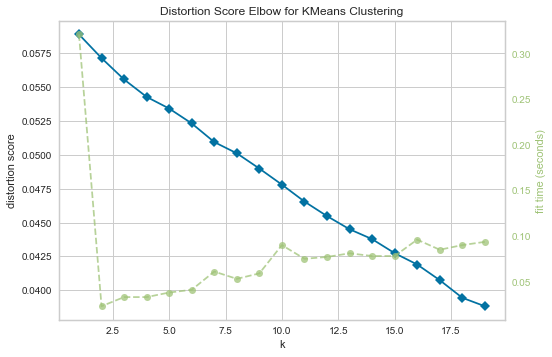

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 
#conclusion: cannot find a goot fit --> no elbow detected due to bad clustering

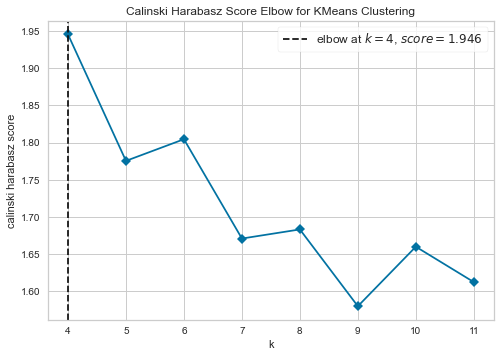

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [25]:
# tried KMeans by calinski harabasz score
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

In [33]:
#change the n_clusuters number acc to the graph for the optimal cluster from Calinski Harabasz Score
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

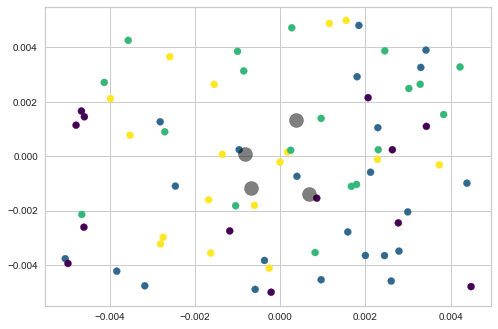

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

conclusion: poor cluster number, data is also very scattered